In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [2]:
df = pd.read_csv("ScimagoJR-2024-CS-conf.csv", sep=';')
df_fem = df[['Open Access', '%Female', 'Region']].copy()
df_fem['Type'] = 'cs-conf'

In [3]:
df = pd.read_csv("ScimagoJR-2024-CS-jour.csv", sep=';')
df_sup = df[['Open Access', '%Female', 'Region']].copy()
df_sup['Type'] = 'cs-jour'

df_fem = pd.concat([df_fem, df_sup], ignore_index=True)

In [4]:
df = pd.read_csv("ScimagoJR-2024-SE-conf.csv", sep=';')
df_sup = df[['Open Access', '%Female', 'Region']].copy()
df_sup['Type'] = 'se-conf'

df_fem = pd.concat([df_fem, df_sup], ignore_index=True)

In [5]:
df = pd.read_csv("ScimagoJR-2024-SE-jour.csv", sep=';')
df_sup = df[['Open Access', '%Female', 'Region']].copy()
df_sup['Type'] = 'se-jour'

df_fem = pd.concat([df_fem, df_sup], ignore_index=True)

In [6]:
df_fem['%Female'] = (df_fem['%Female'].astype(str).str.replace(',', '.', regex=False).astype(float))

In [7]:
df_fem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open Access  2885 non-null   object 
 1   %Female      2885 non-null   float64
 2   Region       2885 non-null   object 
 3   Type         2885 non-null   object 
dtypes: float64(1), object(3)
memory usage: 90.3+ KB


## Open Access vs Non-Open Access

In [8]:
df_fem.groupby('Open Access')['%Female'].mean()

Open Access
No     27.104415
Yes    31.260359
Name: %Female, dtype: float64

In [9]:
pivot = df_fem.pivot_table(
    values  = '%Female',
    index   = 'Open Access',
    columns = 'Type',
    aggfunc = 'mean'
)
print(pivot)

Type           cs-conf    cs-jour    se-conf    se-jour
Open Access                                            
No           18.755215  30.107684  18.571833  26.876578
Yes          30.859000  31.861703  21.532500  26.632875


In [10]:
agg = df_fem.groupby(['Open Access', 'Type'], as_index=False)['%Female'].mean()
agg = agg.sort_values('%Female')

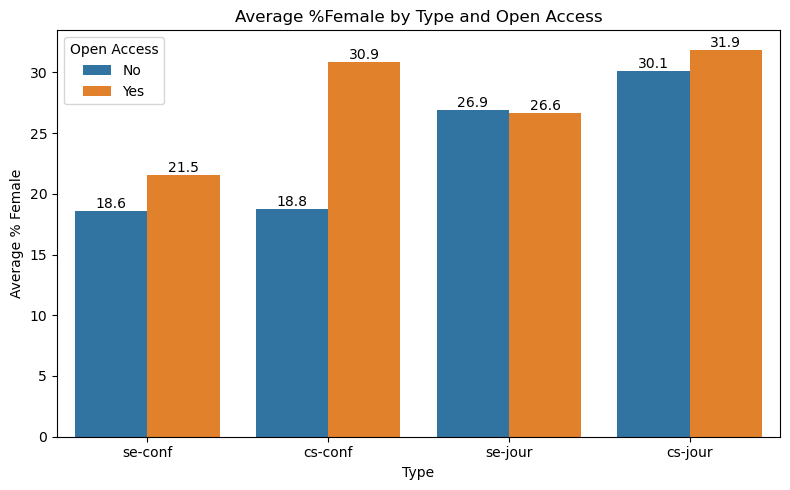

In [11]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data = agg,
    x    = 'Type',
    y    = '%Female',
    hue  = 'Open Access'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.ylabel('Average % Female')
plt.xlabel('Type')
plt.title('Average %Female by Type and Open Access')
plt.legend(title='Open Access')
plt.tight_layout()
plt.show()

## Regional Analysis

In [12]:
df_fem.groupby('Region')['%Female'].mean().sort_values(ascending=False).head(10)

Region
Africa                41.615000
Latin America         34.068333
Africa/Middle East    31.830000
Asiatic Region        30.534590
Middle East           30.343043
Western Europe        29.880458
Eastern Europe        28.977256
Pacific Region        28.646364
Northern America      25.339163
Name: %Female, dtype: float64

In [13]:
pivot = df_fem.pivot_table(
    values  = '%Female',
    index   = 'Region',
    columns = 'Type',
    aggfunc = 'mean'
)
print(pivot)

Type                  cs-conf    cs-jour    se-conf    se-jour
Region                                                        
Africa                    NaN  41.615000        NaN        NaN
Africa/Middle East        NaN  31.830000        NaN        NaN
Asiatic Region      21.127143  30.731028        NaN  30.796000
Eastern Europe      31.219091  30.035484   8.823333  25.307308
Latin America        0.000000  35.708214        NaN  22.220000
Middle East               NaN  30.979545        NaN  16.340000
Northern America    17.751852  29.878806  17.927619  26.077851
Pacific Region      12.277500  38.000000        NaN        NaN
Western Europe      23.041667  31.075727  25.367500  26.808010


In [14]:
agg = df_fem.groupby(['Region', 'Type'], as_index=False)['%Female'].mean()
agg = agg.sort_values('%Female')

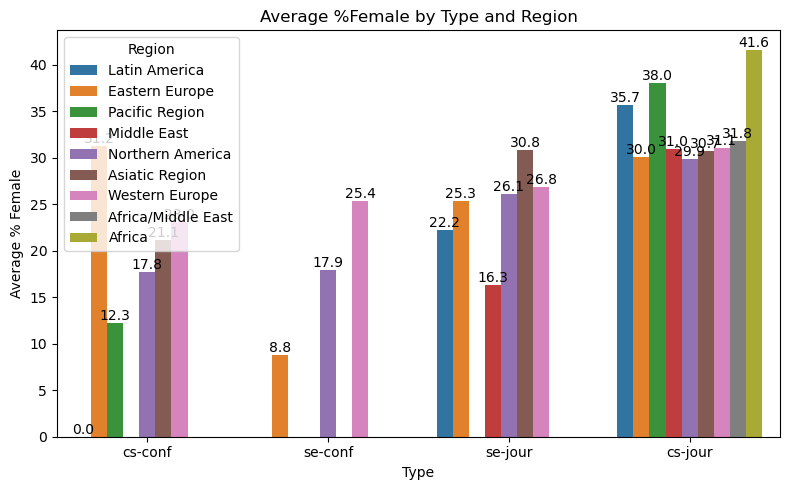

In [15]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data = agg,
    x    = 'Type',
    y    = '%Female',
    hue  = 'Region'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.ylabel('Average % Female')
plt.xlabel('Type')
plt.title('Average %Female by Type and Region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()